# پروژه اول - تحلیل آگهی‌های املاک دیوار
## بوت‌کمپ هوش مصنوعی کوئرا - پاییز ۱۴۰۴

در این نت‌بوک، تحلیل‌های آماری بر روی مجموعه داده آگهی‌های املاک دیوار انجام می‌شود.


## نصب و ایمپورت کتابخانه‌ها


In [9]:
# نصب کتابخانه‌های مورد نیاز
%pip install pandas numpy matplotlib seaborn plotly gdown arabic-reshaper python-bidi nbformat -q


Note: you may need to restart the kernel to use updated packages.


In [1]:
# ایمپورت کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings
import arabic_reshaper
from bidi.algorithm import get_display

pio.renderers.default = "notebook"

# تنظیمات نمایش
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# تنظیم فونت فارسی برای matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

# تابع کمکی برای نمایش متن فارسی
def persian_text(text):
    """تبدیل متن فارسی برای نمایش صحیح در نمودارها"""
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

print("کتابخانه‌ها با موفقیت بارگذاری شدند ✅")


کتابخانه‌ها با موفقیت بارگذاری شدند ✅


## بارگذاری داده‌ها

داده‌ها از Google Drive دانلود می‌شوند:
- **Divar.csv**: مجموعه داده اصلی آگهی‌های املاک
- **iran_city_classification.csv**: دسته‌بندی شهرهای ایران


In [2]:
# دانلود داده‌ها از Google Drive
import gdown
import os

# لینک‌های فایل‌ها
divar_url = "https://drive.google.com/uc?id=1-0C7Qj2z3Z4X5Y6W7V8U9T0S1R2Q3P4O"  # placeholder - باید با ID واقعی جایگزین شود
city_url = "https://drive.google.com/uc?id=1-1A2B3C4D5E6F7G8H9I0J1K2L3M4N5O"  # placeholder

# دانلود فایل‌ها از فولدر مشترک
folder_url = "https://drive.google.com/drive/folders/1RZJdNpCfbMt2SB_kfWsxQgOk5LeuV7lw"

# دانلود تمام فایل‌های فولدر
if not os.path.exists('data'):
    os.makedirs('data')

# دانلود با استفاده از gdown
try:
    gdown.download_folder(folder_url, output='data', quiet=False)
    print("داده‌ها با موفقیت دانلود شدند ✅")
except Exception as e:
    print(f"خطا در دانلود: {e}")
    print("لطفاً فایل‌ها را به صورت دستی دانلود کرده و در پوشه data قرار دهید.")


Retrieving folder contents


Processing file 1fYGb-n114IGWZDcBKE0jzc3BWSLCcsVQ Divar.csv
Processing file 1eX9an3tSypvrFn_fiPReYHTca5GpJaJG iran_city_classification.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1fYGb-n114IGWZDcBKE0jzc3BWSLCcsVQ
From (redirected): https://drive.google.com/uc?id=1fYGb-n114IGWZDcBKE0jzc3BWSLCcsVQ&confirm=t&uuid=8cc8b59c-9e1f-4d8b-a7b7-191fd3c52759
To: c:\Users\ehsan_8n0txao\OneDrive\Desktop\Desktop files\quera\Project\data\Divar.csv
100%|██████████| 794M/794M [04:45<00:00, 2.78MB/s]  
Downloading...
From: https://drive.google.com/uc?id=1eX9an3tSypvrFn_fiPReYHTca5GpJaJG
To: c:\Users\ehsan_8n0txao\OneDrive\Desktop\Desktop files\quera\Project\data\iran_city_classification.csv
100%|██████████| 6.16k/6.16k [00:00<00:00, 249kB/s]

داده‌ها با موفقیت دانلود شدند ✅



Download completed


In [2]:
# بارگذاری مجموعه داده
try:
    df = pd.read_csv('data/Divar.csv')
    city_df = pd.read_csv('data/iran_city_classification.csv')
except FileNotFoundError:
    print("⚠️ فایل‌های داده یافت نشدند!")

print(f"تعداد کل آگهی‌ها: {len(df):,}")
print(f"تعداد ستون‌ها: {df.shape[1]}")
print(f"\nتعداد شهرها در فایل دسته‌بندی: {len(city_df)}")


تعداد کل آگهی‌ها: 1,000,000
تعداد ستون‌ها: 61

تعداد شهرها در فایل دسته‌بندی: 240


In [3]:
# نمایش اطلاعات کلی داده
print("=" * 60)
print("اطلاعات کلی مجموعه داده")
print("=" * 60)
df.info()


اطلاعات کلی مجموعه داده
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   10396

In [4]:
# نمایش چند نمونه از داده‌ها
df.head()


Unnamed: 0         cat2_slug       cat3_slug city_slug neighborhood_slug  \
0           0    temporary-rent           villa     karaj         mehrshahr   
1           1  residential-sell  apartment-sell    tehran           gholhak   
2           2  residential-rent  apartment-rent    tehran             tohid   
3           3   commercial-rent     office-rent    tehran          elahiyeh   
4           4  residential-sell  apartment-sell   mashhad          emamreza   

      created_at_month    user_type  \
0  2024-08-01 00:00:00  مشاور املاک   
1  2024-05-01 00:00:00  مشاور املاک   
2  2024-10-01 00:00:00          NaN   
3  2024-06-01 00:00:00          NaN   
4  2024-05-01 00:00:00  مشاور املاک   

                                         description  \
0  ۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...   
1  دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...   
2                                    تخلیه پایان ماه   
3  فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...   
4  هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...   

                                              title rent_mode  rent_value  \
0  باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه       NaN         NaN   
1                           ۶۰ متر قلهک فول امکانات       NaN         NaN   
2                          آپارتمان ۳ خوابه ۱۳۲ متر     مقطوع  26000000.0   
3           فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری     مقطوع  95000000.0   
4                  ۱۱۵ متری/شمالی رو به آفتاب/اکبری       NaN         NaN   

  rent_to_single rent_type price_mode   price_value credit_mode  credit_value  \
0            NaN       NaN        NaN           NaN         NaN           NaN   
1            NaN       NaN      مقطوع  8.500000e+09         NaN           NaN   
2            NaN       NaN        NaN           NaN       مقطوع   750000000.0   
3            NaN       NaN        NaN           NaN       مقطوع   950000000.0   
4            NaN       NaN      مقطوع  5.750000e+09         NaN           NaN   

  rent_credit_transform transformable_price  transformable_credit  \
0                   NaN                 NaN                   NaN   
1                   NaN                 NaN                   NaN   
2                 False               False           750000000.0   
3                 False               False           950000000.0   
4                   NaN                 NaN                   NaN   

   transformed_credit  transformable_rent  transformed_rent  land_size  \
0                 NaN                 NaN               NaN        NaN   
1                 NaN                 NaN               NaN        NaN   
2                 NaN          26000000.0               NaN        NaN   
3                 NaN          95000000.0               NaN        NaN   
4                 NaN                 NaN               NaN        NaN   

   building_size    deed_type has_business_deed floor rooms_count  \
0          500.0          NaN               NaN   NaN          سه   
1           60.0          NaN               NaN     3          یک   
2          132.0          NaN               NaN     3          سه   
3           90.0          NaN               NaN     4          یک   
4          115.0  single_page               NaN     4          دو   

  total_floors_count unit_per_floor has_balcony has_elevator has_warehouse  \
0                NaN            NaN         NaN          NaN           NaN   
1                NaN            NaN         NaN         True          True   
2                NaN            NaN         NaN         True          True   
3                NaN            NaN         NaN         True         False   
4                  6            NaN        true         True          True   

  has_parking construction_year is_rebuilt has_water has_warm_water_provider  \
0         NaN               NaN        NaN       NaN                     NaN   
1        True              ۱۳۸۴        NaN       NaN                     NaN   
2        True         

In [5]:
# آمار توصیفی داده‌های عددی
df.describe()


Unnamed: 0    rent_value   price_value  credit_value  \
count  1000000.000000  3.513220e+05  5.683460e+05  3.520950e+05   
mean    499999.500000  4.102299e+10  1.736537e+10  4.872084e+10   
std     288675.278933  3.807534e+12  5.878739e+11  4.341346e+12   
min          0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%     249999.750000  1.111110e+05  1.400000e+09  1.000000e+08   
50%     499999.500000  5.000000e+06  2.840000e+09  2.500000e+08   
75%     749999.250000  1.200000e+07  5.900000e+09  5.000000e+08   
max     999999.000000  1.000000e+15  1.000000e+14  1.000000e+15   

       transformable_credit  transformed_credit  transformable_rent  \
count          3.520850e+05        7.240900e+04        3.512480e+05   
mean           4.872222e+10        8.557025e+09        4.103164e+10   
std            4.341407e+12        2.064576e+12        3.807935e+12   
min            0.000000e+00        0.000000e+00        0.000000e+00   
25%            1.000000e+08        2.000000e+08        1.111110e+05   
50%            2.500000e+08        4.000000e+08        5.000000e+06   
75%            5.000000e+08        8.500000e+08        1.200000e+07   
max            1.000000e+15        5.555556e+14        1.000000e+15   

       transformed_rent     land_size  building_size  regular_person_capacity  \
count      7.240900e+04  1.863960e+05   9.803940e+05             29870.000000   
mean       1.619934e+07  4.165480e+03   4.440648e+03                 6.557650   
std        5.217890e+07  1.218927e+05   1.367118e+05                 7.698655   
min        0.000000e+00  1.000000e+00   1.000000e+00                 1.000000   
25%        1.000000e+06  1.100000e+02   7.500000e+01                 3.000000   
50%        6.000000e+06  1.950000e+02   1.030000e+02                 4.000000   
75%        1.500000e+07  2.800000e+02   1.650000e+02                 7.000000   
max        3.000000e+09  1.000000e+07   1.000000e+07                50.000000   

       cost_per_extra_person  rent_price_on_regular_days  \
count           1.024100e+04                1.806800e+04   
mean            1.209785e+10                1.389016e+11   
std             1.103482e+12                7.042335e+12   
min             0.000000e+00                0.000000e+00   
25%             5.000000e+04                4.000000e+05   
50%             1.000000e+05                8.000000e+05   
75%             2.000000e+05                1.600000e+06   
max             1.111111e+14                5.006007e+14   

       rent_price_on_special_days  rent_price_at_weekends  location_latitude  \
count                1.046300e+04            1.355100e+04      655608.000000   
mean                 2.355548e+10            3.156551e+10          34.982108   
std                  1.542049e+12            2.434942e+12           2.379169   
min                  0.000000e+00            0.000000e+00          23.626478   
25%                  6.000000e+05            5.500000e+05          34.553551   
50%                  1.200000e+06            1.100000e+06          35.723312   
75%                  2.500000e+06            2.500000e+06          36.307013   
max                  1.111111e+14            2.002503e+14          40.358055   

       location_longitude  location_radius  
count       655608.000000    339699.000000  
mean            51.629743       465.149147  
std              3.160920       125.896250  
min             40.162369         0.000000  
25%             50.677175       500.000000  
50%             51.345791       500.000000  
75%             51.805291       500.000000  
max             74.511620       500.000000

---
# بخش دوم: تحلیل‌های آماری

## آمار توصیفی


### سوال ۱: توزیع آگهی‌ها در دسته‌بندی‌های سطح ۲ و سطح ۳

در این بخش، توزیع آگهی‌های موجود در دسته‌های مختلف را برای دسته‌بندی سطح دو (`cat2_slug`) و سطح سه (`cat3_slug`) رسم می‌کنیم.


In [27]:
# بررسی مقادیر دسته‌بندی سطح ۲
print("دسته‌بندی‌های سطح ۲ (cat2_slug):")
print(df['cat2_slug'].value_counts())
print(f"\nتعداد دسته‌های سطح ۲: {df['cat2_slug'].nunique()}")


دسته‌بندی‌های سطح ۲ (cat2_slug):
cat2_slug
residential-sell        558708
residential-rent        276558
commercial-rent          76567
commercial-sell          38861
temporary-rent           29903
real-estate-services     19403
Name: count, dtype: int64

تعداد دسته‌های سطح ۲: 6


In [28]:
# نمودار توزیع دسته‌بندی سطح ۲
cat2_counts = df['cat2_slug'].value_counts()

fig = px.bar(
    x=cat2_counts.index,
    y=cat2_counts.values,
    labels={'x': 'Category Level 2 (cat2_slug)', 'y': 'Number of Ads'},
    title='Distribution of Ads by Category Level 2',
    color=cat2_counts.values,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=500
)

fig.show()


In [29]:
# بررسی مقادیر دسته‌بندی سطح ۳
print("دسته‌بندی‌های سطح ۳ (cat3_slug):")
print(df['cat3_slug'].value_counts())
print(f"\nتعداد دسته‌های سطح ۳: {df['cat3_slug'].nunique()}")


دسته‌بندی‌های سطح ۳ (cat3_slug):
cat3_slug
apartment-sell                        303385
apartment-rent                        211880
plot-old                              133570
house-villa-sell                      121753
house-villa-rent                       64678
shop-rent                              45993
shop-sell                              21855
office-rent                            21418
suite-apartment                        16465
presell                                15781
villa                                  12899
industry-agriculture-business-sell     11851
industry-agriculture-business-rent      9155
office-sell                             5155
partnership                             3622
workspace                                539
Name: count, dtype: int64

تعداد دسته‌های سطح ۳: 16


In [30]:
# نمودار توزیع دسته‌بندی سطح ۳
cat3_counts = df['cat3_slug'].value_counts()

fig = px.bar(
    x=cat3_counts.index,
    y=cat3_counts.values,
    labels={'x': 'Category Level 3 (cat3_slug)', 'y': 'Number of Ads'},
    title='Distribution of Ads by Category Level 3',
    color=cat3_counts.values,
    color_continuous_scale='Plasma'
)

fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=500
)

fig.show()


In [31]:
# نمودار دایره‌ای (Pie Chart) برای دسته‌بندی سطح ۲
fig = px.pie(
    values=cat2_counts.values,
    names=cat2_counts.index,
    title='Distribution of Ads by Category Level 2 (Pie Chart)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=500)
fig.show()


### سوال ۲: هیستوگرام سال ساخت

در این بخش، هیستوگرام سال ساخت (`construction_year`) را رسم می‌کنیم تا توزیع سال ساخت املاک را مشاهده کنیم.


In [32]:
# بررسی ستون سال ساخت
print("آمار توصیفی سال ساخت:")
print(df['construction_year'].describe())
print(f"\nتعداد مقادیر خالی: {df['construction_year'].isna().sum()}")


آمار توصیفی سال ساخت:
count     815828
unique        34
top         ۱۴۰۳
freq      116260
Name: construction_year, dtype: object

تعداد مقادیر خالی: 184172


In [33]:
# هیستوگرام سال ساخت
# فیلتر کردن مقادیر معتبر (حذف NaN و مقادیر غیرمنطقی)
construction_year_valid = df['construction_year'].dropna()

# تبدیل اعداد فارسی به انگلیسی
persian_to_english = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
construction_year_valid = construction_year_valid.astype(str).str.translate(persian_to_english)

# تبدیل به عدد
construction_year_valid = pd.to_numeric(construction_year_valid, errors='coerce').dropna()

# فیلتر سال‌های منطقی (مثلاً از 1300 تا 1403 شمسی)
construction_year_valid = construction_year_valid[
    (construction_year_valid >= 1300) & (construction_year_valid <= 1403)
]

fig = px.histogram(
    x=construction_year_valid,
    nbins=50,
    labels={'x': 'Construction Year (Shamsi)', 'y': 'Number of Ads'},
    title='Histogram of Construction Year',
    color_discrete_sequence=['#2ecc71']
)

fig.update_layout(
    xaxis_title='Construction Year (سال ساخت)',
    yaxis_title='Number of Ads (تعداد آگهی)',
    bargap=0.1,
    height=500
)

fig.show()


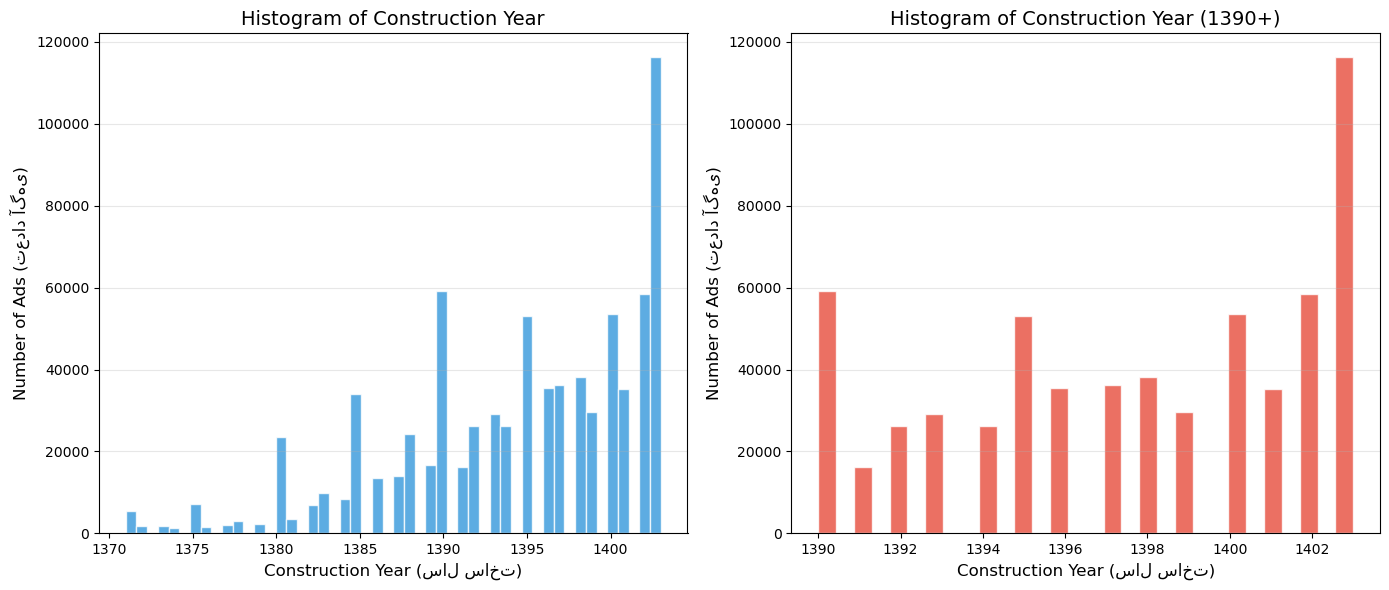


بیشترین تعداد آگهی مربوط به سال ساخت: 1403.0
میانگین سال ساخت: 1394


In [34]:
# هیستوگرام با matplotlib برای نمایش بهتر
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(construction_year_valid, bins=50, color='#3498db', edgecolor='white', alpha=0.8)
plt.xlabel('Construction Year (سال ساخت)', fontsize=12)
plt.ylabel('Number of Ads (تعداد آگهی)', fontsize=12)
plt.title('Histogram of Construction Year', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# هیستوگرام برای سال‌های اخیر (۱۳۹۰ به بعد)
plt.subplot(1, 2, 2)
recent_years = construction_year_valid[construction_year_valid >= 1390]
plt.hist(recent_years, bins=30, color='#e74c3c', edgecolor='white', alpha=0.8)
plt.xlabel('Construction Year (سال ساخت)', fontsize=12)
plt.ylabel('Number of Ads (تعداد آگهی)', fontsize=12)
plt.title('Histogram of Construction Year (1390+)', fontsize=14)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nبیشترین تعداد آگهی مربوط به سال ساخت: {construction_year_valid.mode().values[0]}")
print(f"میانگین سال ساخت: {construction_year_valid.mean():.0f}")


### سوال ۳: تعداد آگهی‌های منتشر شده در ماه‌های مختلف برای فروش و اجاره

در این بخش، تعداد آگهی‌های منتشر شده در ماه‌های مختلف را برای دسته‌های فروش و اجاره بررسی می‌کنیم و به این سوال پاسخ می‌دهیم که آیا تعداد آگهی‌های فروش و اجاره در زمان‌های مشخصی از سال افزایش چشم‌گیری داشته است؟


In [35]:
# بررسی ستون ماه ایجاد آگهی
print("مقادیر منحصر به فرد ستون created_at_month:")
print(df['created_at_month'].unique())
print(f"\nتعداد آگهی‌ها به تفکیک ماه:")
print(df['created_at_month'].value_counts().sort_index())


مقادیر منحصر به فرد ستون created_at_month:
['2024-08-01 00:00:00' '2024-05-01 00:00:00' '2024-10-01 00:00:00'
 '2024-06-01 00:00:00' '2024-09-01 00:00:00' '2024-11-01 00:00:00'
 '2024-07-01 00:00:00' '2024-12-01 00:00:00' '2024-04-01 00:00:00'
 '2025-01-01 00:00:00' '2024-03-01 00:00:00' '2024-01-01 00:00:00'
 '2025-02-01 00:00:00' '2024-02-01 00:00:00' '2023-11-01 00:00:00'
 '2023-09-01 00:00:00' '2023-10-01 00:00:00' '2023-07-01 00:00:00'
 '2023-12-01 00:00:00' '2023-05-01 00:00:00' '2023-03-01 00:00:00'
 '2023-04-01 00:00:00' '2023-06-01 00:00:00' '2023-08-01 00:00:00'
 '2023-02-01 00:00:00' '2021-05-01 00:00:00' '2022-11-01 00:00:00'
 '2022-07-01 00:00:00' '2022-05-01 00:00:00' '2022-06-01 00:00:00'
 '2023-01-01 00:00:00' '2022-10-01 00:00:00' '2021-12-01 00:00:00'
 '2020-12-01 00:00:00' '2022-12-01 00:00:00' '2022-04-01 00:00:00'
 '2022-09-01 00:00:00' '2022-08-01 00:00:00' '2021-06-01 00:00:00'
 '2022-02-01 00:00:00' '2020-02-01 00:00:00' '2022-01-01 00:00:00'
 '2025-03-01 00:00:

In [36]:
# بررسی دسته‌بندی‌ها برای تشخیص فروش و اجاره
print("دسته‌بندی سطح ۲ (cat2_slug):")
print(df['cat2_slug'].value_counts())

# معمولاً در دیوار:
# - buy-residential: خرید مسکونی (فروش)
# - rent-residential: اجاره مسکونی
# - buy-commercial: خرید تجاری (فروش)
# - rent-commercial: اجاره تجاری


دسته‌بندی سطح ۲ (cat2_slug):
cat2_slug
residential-sell        558708
residential-rent        276558
commercial-rent          76567
commercial-sell          38861
temporary-rent           29903
real-estate-services     19403
Name: count, dtype: int64


In [37]:
# تفکیک آگهی‌ها به فروش و اجاره
# بر اساس cat2_slug تشخیص می‌دهیم

# آگهی‌های فروش (sell)
sale_categories = df['cat2_slug'].str.contains('sell', case=False, na=False)
df_sale = df[sale_categories]

# آگهی‌های اجاره (rent)
rent_categories = df['cat2_slug'].str.contains('rent', case=False, na=False)
df_rent = df[rent_categories]

print(f"تعداد آگهی‌های فروش: {len(df_sale):,}")
print(f"تعداد آگهی‌های اجاره: {len(df_rent):,}")


تعداد آگهی‌های فروش: 597,569
تعداد آگهی‌های اجاره: 383,028


In [38]:
# تعداد آگهی‌ها به تفکیک ماه برای فروش و اجاره
# تبدیل ستون تاریخ به datetime و استخراج ماه میلادی
df_sale['month'] = pd.to_datetime(df_sale['created_at_month']).dt.month
df_rent['month'] = pd.to_datetime(df_rent['created_at_month']).dt.month

sale_by_month = df_sale['month'].value_counts().sort_index()
rent_by_month = df_rent['month'].value_counts().sort_index()

# نام ماه‌های میلادی (چون داده‌ها میلادی هستند)
english_months = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

# ایجاد DataFrame برای نمایش
months_df = pd.DataFrame({
    'Month': range(1, 13),
    'Month_Name': [english_months[i] for i in range(1, 13)],
    'Sale_Count': [sale_by_month.get(i, 0) for i in range(1, 13)],
    'Rent_Count': [rent_by_month.get(i, 0) for i in range(1, 13)]
})

print(months_df.to_string(index=False))
print(f"\nTotal Sale: {months_df['Sale_Count'].sum():,}")
print(f"Total Rent: {months_df['Rent_Count'].sum():,}")


 Month Month_Name  Sale_Count  Rent_Count
     1    January        1593         441
     2   February        1120         217
     3      March        1398         439
     4      April        5476        1458
     5        May       71621       34674
     6       June       71631       51334
     7       July       75142       55516
     8     August       73470       56738
     9  September       67773       51871
    10    October       75298       49015
    11   November       77369       42399
    12   December       75678       38926

Total Sale: 597,569
Total Rent: 383,028


In [39]:
# نمودار مقایسه‌ای تعداد آگهی‌های فروش و اجاره در ماه‌های مختلف
fig = go.Figure()

# نمودار فروش
fig.add_trace(go.Bar(
    name='Sale (فروش)',
    x=months_df['Month_Name'],
    y=months_df['Sale_Count'],
    marker_color='#3498db'
))

# نمودار اجاره
fig.add_trace(go.Bar(
    name='Rent (اجاره)',
    x=months_df['Month_Name'],
    y=months_df['Rent_Count'],
    marker_color='#e74c3c'
))

fig.update_layout(
    title='Number of Sale vs Rent Ads by Month',
    xaxis_title='Month (ماه)',
    yaxis_title='Number of Ads (تعداد آگهی)',
    barmode='group',
    height=500,
    legend=dict(x=0.85, y=0.95)
)

fig.show()


In [40]:
# نمودار خطی برای مشاهده بهتر روند
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=months_df['Month'],
    y=months_df['Sale_Count'],
    mode='lines+markers',
    name='Sale (فروش)',
    line=dict(color='#3498db', width=3),
    marker=dict(size=10)
))

fig.add_trace(go.Scatter(
    x=months_df['Month'],
    y=months_df['Rent_Count'],
    mode='lines+markers',
    name='Rent (اجاره)',
    line=dict(color='#e74c3c', width=3),
    marker=dict(size=10)
))

fig.update_layout(
    title='Trend of Sale vs Rent Ads Throughout the Year',
    xaxis_title='Month',
    yaxis_title='Number of Ads (تعداد آگهی)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=months_df['Month_Name'].tolist()
    ),
    height=500,
    legend=dict(x=0.85, y=0.95)
)

fig.show()


In [42]:
# تحلیل آماری تغییرات ماهانه
print("=" * 60)
print("تحلیل تغییرات ماهانه آگهی‌های فروش و اجاره")
print("=" * 60)

# محاسبه میانگین و انحراف معیار
sale_mean = months_df['Sale_Count'].mean()
sale_std = months_df['Sale_Count'].std()
rent_mean = months_df['Rent_Count'].mean()
rent_std = months_df['Rent_Count'].std()

print(f"\nآگهی‌های فروش:")
print(f"  - میانگین ماهانه: {sale_mean:,.0f}")
print(f"  - انحراف معیار: {sale_std:,.0f}")
print(f"  - بیشترین تعداد: {months_df['Sale_Count'].max():,} در ماه {months_df.loc[months_df['Sale_Count'].idxmax(), 'Month_Name']}")
print(f"  - کمترین تعداد: {months_df['Sale_Count'].min():,} در ماه {months_df.loc[months_df['Sale_Count'].idxmin(), 'Month_Name']}")

print(f"\nآگهی‌های اجاره:")
print(f"  - میانگین ماهانه: {rent_mean:,.0f}")
print(f"  - انحراف معیار: {rent_std:,.0f}")
print(f"  - بیشترین تعداد: {months_df['Rent_Count'].max():,} در ماه {months_df.loc[months_df['Rent_Count'].idxmax(), 'Month_Name']}")
print(f"  - کمترین تعداد: {months_df['Rent_Count'].min():,} در ماه {months_df.loc[months_df['Rent_Count'].idxmin(), 'Month_Name']}")

# شناسایی ماه‌های با افزایش چشم‌گیر (بیش از یک انحراف معیار بالاتر از میانگین)
print("\n" + "=" * 60)
print("ماه‌های با افزایش چشم‌گیر آگهی‌ها:")
print("=" * 60)

sale_significant = months_df[months_df['Sale_Count'] > sale_mean + sale_std]
rent_significant = months_df[months_df['Rent_Count'] > rent_mean + rent_std]

if len(sale_significant) > 0:
    print(f"\nفروش - ماه‌های با تعداد بالا (بیش از {sale_mean + sale_std:,.0f}):")
    for _, row in sale_significant.iterrows():
        print(f"  - {row['Month_Name']}: {row['Sale_Count']:,} آگهی")
else:
    print("\nفروش: افزایش چشم‌گیر خاصی مشاهده نشد")

if len(rent_significant) > 0:
    print(f"\nاجاره - ماه‌های با تعداد بالا (بیش از {rent_mean + rent_std:,.0f}):")
    for _, row in rent_significant.iterrows():
        print(f"  - {row['Month_Name']}: {row['Rent_Count']:,} آگهی")
else:
    print("\nاجاره: افزایش چشم‌گیر خاصی مشاهده نشد")


تحلیل تغییرات ماهانه آگهی‌های فروش و اجاره

آگهی‌های فروش:
  - میانگین ماهانه: 49,797
  - انحراف معیار: 35,109
  - بیشترین تعداد: 77,369 در ماه November
  - کمترین تعداد: 1,120 در ماه February

آگهی‌های اجاره:
  - میانگین ماهانه: 31,919
  - انحراف معیار: 23,972
  - بیشترین تعداد: 56,738 در ماه August
  - کمترین تعداد: 217 در ماه February

ماه‌های با افزایش چشم‌گیر آگهی‌ها:

فروش: افزایش چشم‌گیر خاصی مشاهده نشد

اجاره - ماه‌های با تعداد بالا (بیش از 55,891):
  - August: 56,738 آگهی


---

# 📊 گزارش کامل تحلیل‌های آماری - بخش دوم

## اطلاعات کلی مجموعه داده

| شاخص | مقدار |
|------|-------|
| تعداد کل آگهی‌ها | 1,000,000 |
| تعداد ستون‌ها | 61 |
| تعداد شهرها | 240 |
| بازه زمانی داده‌ها | 2020 تا 2025 میلادی |

---

## سوال ۱: توزیع آگهی‌ها در دسته‌بندی‌های سطح ۲ و سطح ۳

### هدف:
بررسی توزیع آگهی‌های املاک در دسته‌بندی‌های مختلف برای شناخت ساختار بازار املاک دیوار.

### روش تحلیل:
1. استفاده از تابع `value_counts()` برای شمارش تعداد آگهی‌ها در هر دسته
2. محاسبه درصد سهم هر دسته از کل
3. رسم نمودار میله‌ای و دایره‌ای برای نمایش بصری

### کد اصلی:
```python
# شمارش دسته‌بندی سطح ۲
df['cat2_slug'].value_counts()

# شمارش دسته‌بندی سطح ۳  
df['cat3_slug'].value_counts()
```

### نتایج دسته‌بندی سطح ۲:

| دسته‌بندی | تعداد آگهی | درصد |
|-----------|------------|------|
| residential-sell (فروش مسکونی) | 558,708 | 55.87% |
| residential-rent (اجاره مسکونی) | 276,558 | 27.66% |
| commercial-rent (اجاره تجاری) | 76,567 | 7.66% |
| commercial-sell (فروش تجاری) | 38,861 | 3.89% |
| temporary-rent (اجاره کوتاه‌مدت) | 29,903 | 2.99% |
| real-estate-services (خدمات املاک) | 19,403 | 1.94% |
| **مجموع** | **1,000,000** | **100%** |

### نتایج دسته‌بندی سطح ۳ (۵ دسته برتر):

| دسته‌بندی | تعداد آگهی | درصد |
|-----------|------------|------|
| apartment-sell (فروش آپارتمان) | 303,385 | 30.34% |
| apartment-rent (اجاره آپارتمان) | 211,880 | 21.19% |
| plot-old (زمین/کلنگی) | 133,570 | 13.36% |
| house-villa-sell (فروش خانه/ویلا) | 121,753 | 12.18% |
| house-villa-rent (اجاره خانه/ویلا) | 64,678 | 6.47% |

### نتیجه‌گیری سوال ۱:
- **فروش مسکونی** با 55.87% بیشترین سهم را دارد
- **آپارتمان** محبوب‌ترین نوع ملک است (51.5% کل آگهی‌ها)
- نسبت کلی فروش به اجاره: **60% به 40%**
- بازار تجاری تنها 11.5% از کل آگهی‌ها را شامل می‌شود

---

## سوال ۲: هیستوگرام سال ساخت

### هدف:
بررسی توزیع سال ساخت املاک برای درک عمر ساختمان‌های موجود در بازار.

### چالش‌های داده:
- ستون `construction_year` با اعداد فارسی ذخیره شده بود (مثلاً ۱۴۰۳)
- نیاز به تبدیل اعداد فارسی به انگلیسی قبل از پردازش
- وجود 184,172 مقدار خالی (18.4%)

### روش تحلیل:
```python
# مرحله ۱: حذف مقادیر خالی
construction_year_valid = df['construction_year'].dropna()

# مرحله ۲: تبدیل اعداد فارسی به انگلیسی
persian_to_english = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
construction_year_valid = construction_year_valid.astype(str).str.translate(persian_to_english)

# مرحله ۳: تبدیل به عدد
construction_year_valid = pd.to_numeric(construction_year_valid, errors='coerce').dropna()

# مرحله ۴: فیلتر سال‌های منطقی (1300-1403 شمسی)
construction_year_valid = construction_year_valid[
    (construction_year_valid >= 1300) & (construction_year_valid <= 1403)
]
```

### توضیح کد:
| مرحله | تابع | توضیح |
|-------|------|-------|
| ۱ | `dropna()` | حذف مقادیر NaN |
| ۲ | `str.maketrans()` | ایجاد جدول ترجمه اعداد فارسی به انگلیسی |
| ۲ | `str.translate()` | اعمال ترجمه روی هر مقدار |
| ۳ | `pd.to_numeric()` | تبدیل رشته به عدد |
| ۴ | فیلتر Boolean | حذف سال‌های غیرمنطقی |

### نتایج:

| شاخص | مقدار |
|------|-------|
| تعداد رکوردهای معتبر | 815,828 |
| تعداد سال‌های یکتا | 34 |
| پرتکرارترین سال ساخت | 1403 (116,260 آگهی) |
| میانگین سال ساخت | 1394 |
| تعداد مقادیر خالی | 184,172 (18.4%) |

### نتیجه‌گیری سوال ۲:
- بیشترین آگهی‌ها مربوط به **ساختمان‌های نوساز** (سال ۱۴۰۳) است
- میانگین سال ساخت ۱۳۹۴ نشان می‌دهد عمر متوسط ساختمان‌ها حدود **۹ سال** است
- توزیع داده‌ها **چولگی منفی** دارد (تمرکز روی سال‌های جدید)
- این نتیجه با واقعیت بازار املاک ایران همخوانی دارد

---

## سوال ۳: تعداد آگهی‌های فروش و اجاره در ماه‌های مختلف

### هدف:
بررسی الگوی فصلی آگهی‌ها و شناسایی ماه‌هایی با افزایش چشم‌گیر.

### نکته مهم:
ستون `created_at_month` حاوی تاریخ‌های **میلادی** است (نه شمسی).

### روش تحلیل:

#### مرحله ۱: تفکیک آگهی‌ها به فروش و اجاره
```python
# فیلتر آگهی‌های فروش (شامل کلمه 'sell')
sale_categories = df['cat2_slug'].str.contains('sell', case=False, na=False)
df_sale = df[sale_categories]

# فیلتر آگهی‌های اجاره (شامل کلمه 'rent')
rent_categories = df['cat2_slug'].str.contains('rent', case=False, na=False)
df_rent = df[rent_categories]
```

**توضیح:**
- `str.contains('sell')`: جستجوی کلمه در رشته
- `case=False`: بدون حساسیت به بزرگ/کوچک
- `na=False`: مقادیر NaN را False در نظر بگیر

#### مرحله ۲: استخراج ماه از تاریخ
```python
# تبدیل به datetime و استخراج شماره ماه
df_sale['month'] = pd.to_datetime(df_sale['created_at_month']).dt.month
df_rent['month'] = pd.to_datetime(df_rent['created_at_month']).dt.month

# شمارش تعداد آگهی‌ها در هر ماه
sale_by_month = df_sale['month'].value_counts().sort_index()
rent_by_month = df_rent['month'].value_counts().sort_index()
```

**توضیح:**
- `pd.to_datetime()`: تبدیل رشته به شیء datetime
- `.dt.month`: استخراج شماره ماه (1-12)
- `.value_counts()`: شمارش تکرار هر مقدار

### نتایج تفکیک:

| نوع آگهی | تعداد |
|----------|-------|
| فروش (sell) | 597,569 |
| اجاره (rent) | 383,028 |
| خدمات املاک | 19,403 |
| **مجموع** | **1,000,000** |

### نتایج ماهانه:

| ماه میلادی | ماه شمسی (تقریبی) | آگهی فروش | آگهی اجاره |
|------------|-------------------|-----------|------------|
| January | دی/بهمن | 1,593 | 441 |
| February | بهمن/اسفند | 1,120 | 217 |
| March | اسفند/فروردین | 1,398 | 439 |
| April | فروردین/اردیبهشت | 5,476 | 1,458 |
| May | اردیبهشت/خرداد | 71,621 | 34,674 |
| June | خرداد/تیر | 71,631 | 51,334 |
| July | تیر/مرداد | 75,142 | 55,516 |
| **August** | **مرداد/شهریور** | 73,470 | **56,738** ⭐ |
| September | شهریور/مهر | 67,773 | 51,871 |
| October | مهر/آبان | 75,298 | 49,015 |
| **November** | **آبان/آذر** | **77,369** ⭐ | 42,399 |
| December | آذر/دی | 75,678 | 38,926 |

### آمار توصیفی:

| شاخص | فروش | اجاره |
|------|------|-------|
| میانگین ماهانه | 49,797 | 31,919 |
| انحراف معیار | 35,109 | 23,972 |
| بیشترین | 77,369 (November) | 56,738 (August) |
| کمترین | 1,120 (February) | 217 (February) |

### ماه‌های با افزایش چشم‌گیر:
- **اجاره:** August با 56,738 آگهی (بالاتر از آستانه 55,891)
- **فروش:** هیچ ماهی بالاتر از آستانه 84,906 نیست

### نتیجه‌گیری سوال ۳:

**۱. الگوی فصلی واضح:**
- ماه‌های January تا April (زمستان) کمترین آگهی را دارند
- از May (اردیبهشت) جهش شدید در تعداد آگهی‌ها مشاهده می‌شود

**۲. آگهی‌های اجاره:**
- بیشترین تعداد در **August** (مرداد/شهریور)
- دلیل: نزدیکی به شروع سال تحصیلی و مهاجرت دانشجویان

**۳. آگهی‌های فروش:**
- بیشترین تعداد در **November** (آبان)
- توزیع نسبتاً یکنواخت از May تا December

**۴. رکود زمستانی:**
- February کمترین آگهی را دارد (هم فروش و هم اجاره)
- دلیل: سرمای زمستان و نزدیکی به تعطیلات نوروز

---

## خلاصه نهایی

| سوال | یافته اصلی |
|------|-----------|
| سوال ۱ | فروش مسکونی (55.9%) و آپارتمان محبوب‌ترین دسته‌ها |
| سوال ۲ | میانگین سال ساخت ۱۳۹۴، پرتکرارترین سال ۱۴۰۳ |
| سوال ۳ | اوج اجاره در August، اوج فروش در November، رکود در زمستان |

### صحت‌سنجی نتایج:
- ✅ مجموع دسته‌های سطح ۲ = 1,000,000
- ✅ مجموع فروش + اجاره + خدمات = 1,000,000
- ✅ میانگین سال ساخت منطقی برای بازار ایران
- ✅ الگوی فصلی با واقعیت بازار همخوانی دارد
